# Housing Price Prediction

## Project Sourcing
This project sets out to predict housing prices based on a variety of features. This data is sourced from Belsley, Kuh & Welsch, 'Regression diagnostics …', Wiley,1980. N.B. Various transformations are used in the table on pages 244-261. Quinlan (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

The dataset is concerned about the house values of homes in the suburbs of Boston. Below is a description of the features in the dataset:

1) CRIM : per capita crime rate by town

2) ZN : proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5) NOX : nitric oxides concentration (parts per 10 million)

6) RM : average number of rooms per dwelling

7) AGE : proportion of owner-occupied units built prior to 1940

8) DIS : weighted distances to five Boston employment centres

9) RAD : index of accessibility to radial highways

10) TAX : full-value property-tax rate per \$10,000

11) PTRATIO : pupil-teacher ratio by town B : 1000(B_k - 0.63)^2 where B_k is the proportion of blacks by town

13) LSTAT: % lower status of the population

14) MEDV : Median value of owner-occupied homes in \$1000's

## Project Goals
In this project, we set out to develop the following regression based models. We will analyze the effectiveness of these regression models and keep track of their error rates. 
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression
4. Bagging Regressor (??)
5. Ada Boost Regressor
6. K-Nearest Neighbors Regressor
7. SVM

## Import Libraries and perform initial data-checks

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

sns.set(color_codes = True)
sns.set_palette(palette = 'flare', n_colors = 9)

In [6]:
df = pd.read_csv('data/Housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [7]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0
508,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1.0,273,21.0,396.90,7.88,11.9


In [9]:
df.shape

(509, 14)

In [11]:
col = df.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Data Processing

In [15]:
#Drop Duplicates, and check for duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [16]:
#Check for missing values
df.isna().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [20]:
# Dealing with missing values (Could drop all missing values, or replace missing values with respective medians)

# Drop Method Here
df = df.dropna()
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [19]:
df.shape

(497, 14)

In [22]:
#Dataype information before manipulation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     497 non-null    float64
 1   ZN       497 non-null    float64
 2   INDUS    497 non-null    float64
 3   CHAS     497 non-null    int64  
 4   NOX      497 non-null    float64
 5   RM       497 non-null    float64
 6   AGE      497 non-null    float64
 7   DIS      497 non-null    float64
 8   RAD      497 non-null    float64
 9   TAX      497 non-null    int64  
 10  PTRATIO  497 non-null    float64
 11  B        497 non-null    float64
 12  LSTAT    497 non-null    float64
 13  MEDV     497 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 58.2 KB


In [24]:
#Datatype manipulation based on dataset description provided
df["AGE"] = df["AGE"].astype(int)
df["ZN"] = df["ZN"].astype(int)
df["RAD"] = df["RAD"].astype(int)
df["TAX"] = df["TAX"].astype(int)

In [25]:
#Dataype information after manipulation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     497 non-null    float64
 1   ZN       497 non-null    int64  
 2   INDUS    497 non-null    float64
 3   CHAS     497 non-null    int64  
 4   NOX      497 non-null    float64
 5   RM       497 non-null    float64
 6   AGE      497 non-null    int64  
 7   DIS      497 non-null    float64
 8   RAD      497 non-null    int64  
 9   TAX      497 non-null    int64  
 10  PTRATIO  497 non-null    float64
 11  B        497 non-null    float64
 12  LSTAT    497 non-null    float64
 13  MEDV     497 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 58.2 KB


In [26]:
#Final Check on data
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78,4.9671,2,242,17.8,396.9,9.14,21.6


## Exploratory Data Analysis

In [29]:
# Statistical Summary of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,497.0,3.660619,8.666654,0.00632,0.08221,0.26363,3.69311,88.9762
ZN,497.0,11.241449,23.102900,0.00000,0.00000,0.00000,12.00000,100.0000
INDUS,497.0,11.187968,6.885694,0.46000,5.19000,9.69000,18.10000,27.7400
CHAS,497.0,0.070423,0.256116,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,497.0,0.555792,0.116062,0.38500,0.45300,0.53800,0.62400,0.8710
RM,497.0,6.288781,0.706520,3.56100,5.88700,6.21100,6.62900,8.7800
AGE,497.0,68.587525,28.034844,2.00000,45.00000,77.00000,94.00000,100.0000
DIS,497.0,3.786900,2.114104,1.12960,2.08820,3.18270,5.11800,12.1265
RAD,497.0,9.607646,8.733336,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,497.0,409.169014,169.018179,187.00000,279.00000,330.00000,666.00000,711.0000


### Visualization

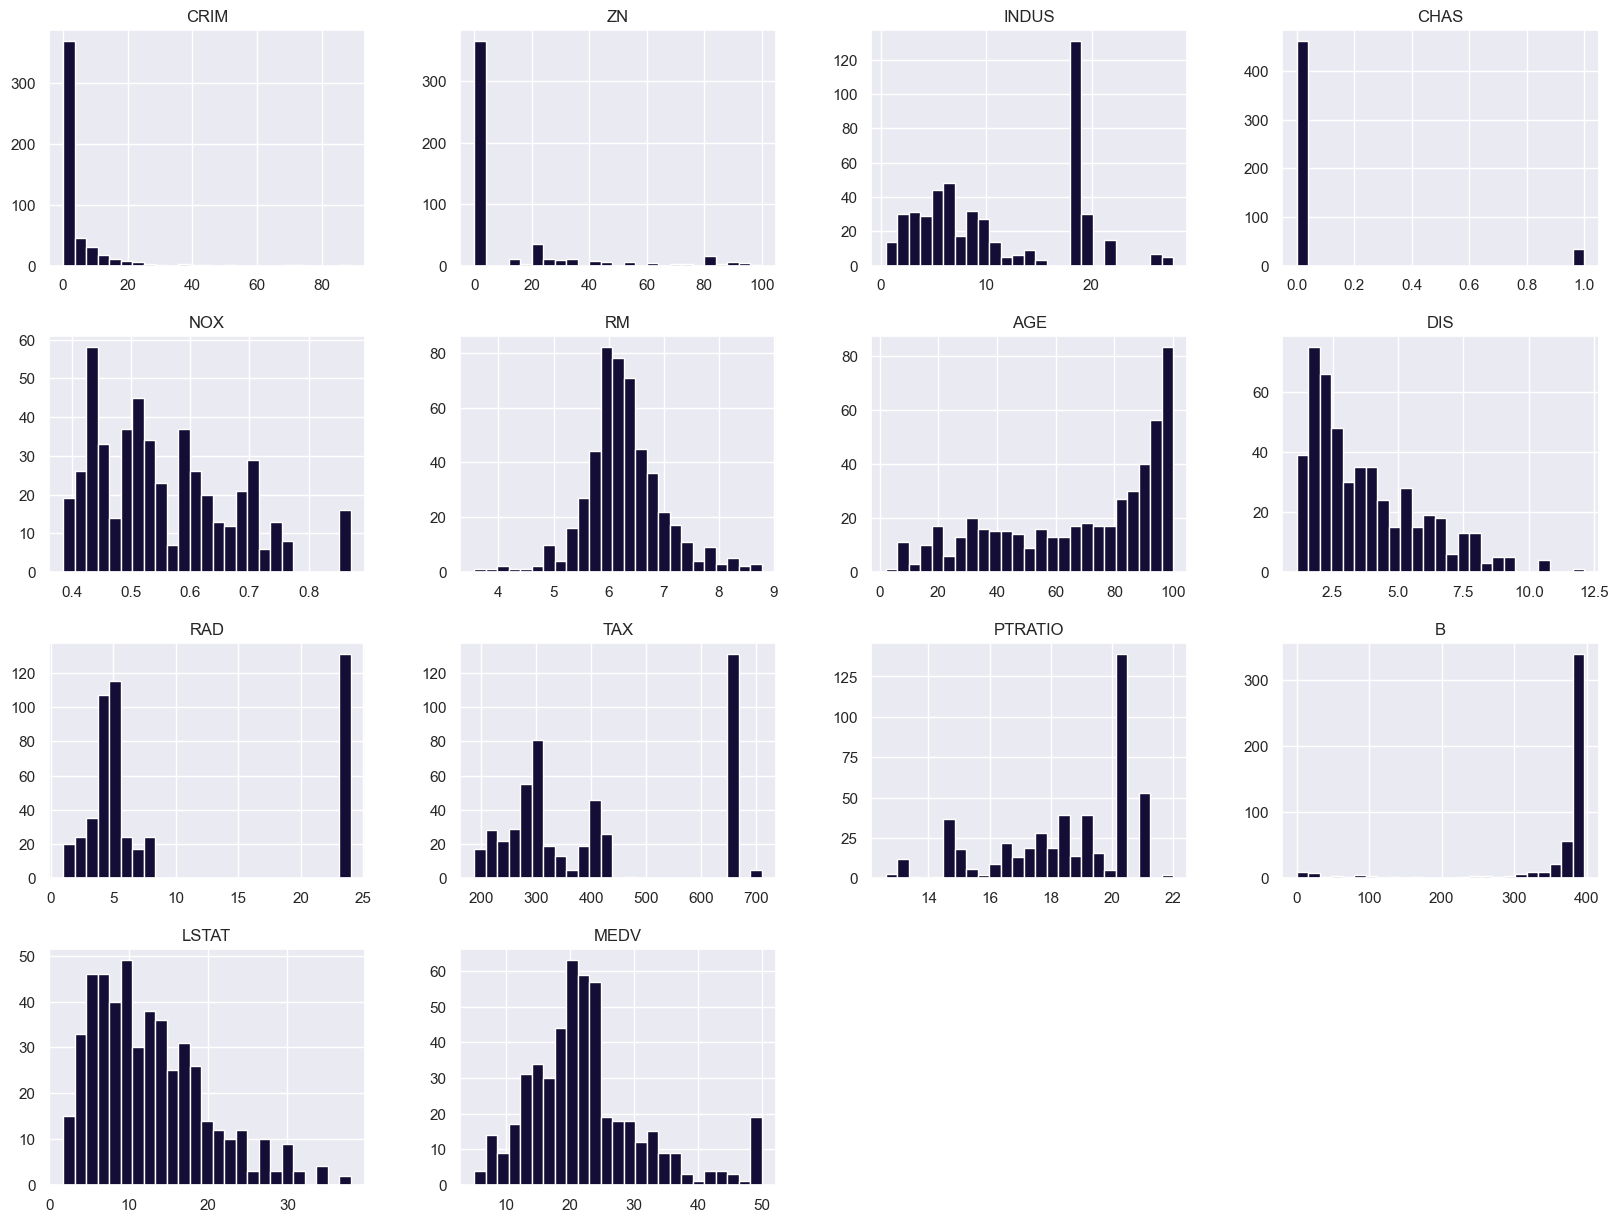

In [32]:
### Histogram analysis to understand distribution of data
df.hist(bins=25,figsize=(20,15))
plt.show()

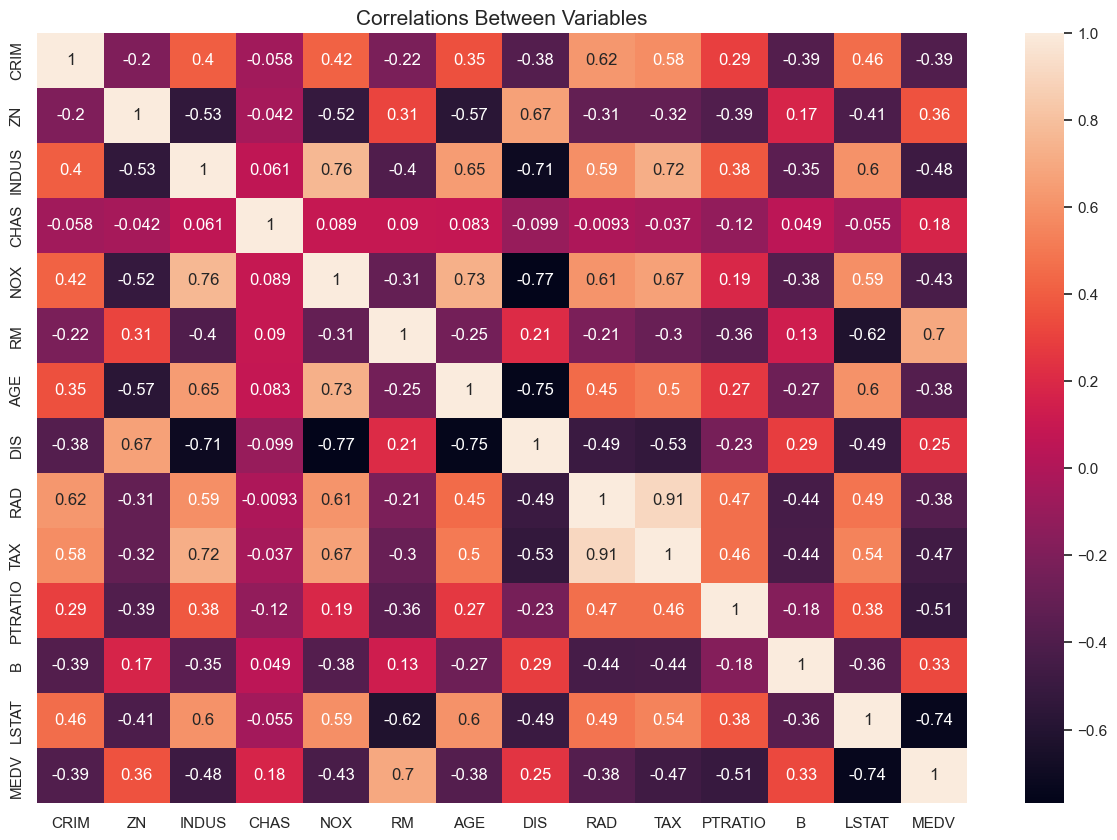

In [36]:
### Correlation Matrix for numerical variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlations Between Variables",size=15)
plt.show()

In [38]:
### Numerical ordering of correlations
corr = df.corr()
corr["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695563
ZN         0.360964
B          0.329859
DIS        0.248301
CHAS       0.175393
AGE       -0.379198
RAD       -0.380660
CRIM      -0.389243
NOX       -0.428131
TAX       -0.467655
INDUS     -0.483832
PTRATIO   -0.510868
LSTAT     -0.737621
Name: MEDV, dtype: float64

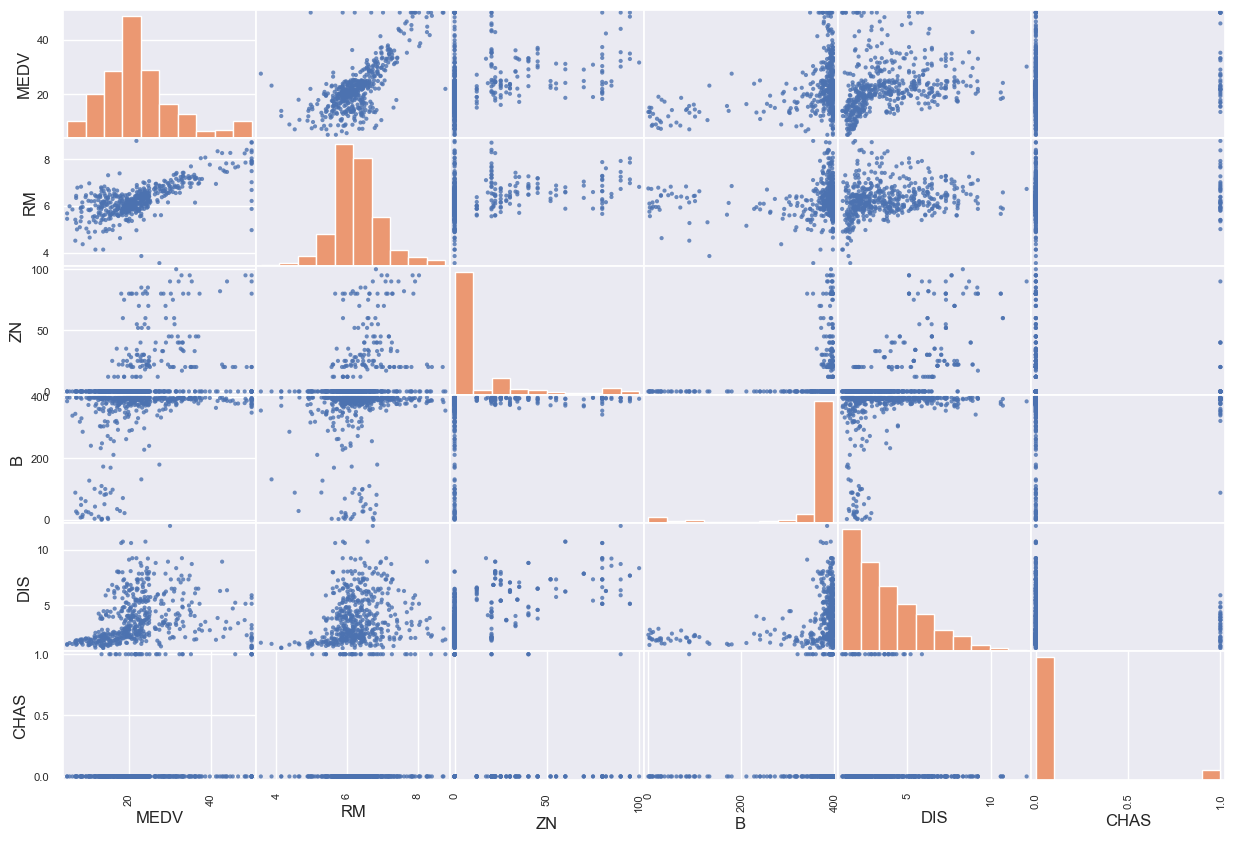

In [42]:
### Inspect scatter matrix of positively correlated variables
from pandas.plotting import scatter_matrix
positive_corr = ["MEDV", "RM", "ZN", "B", "DIS", "CHAS"]
scatter_matrix(df[positive_corr], color= "b", alpha = 0.8, figsize=(15,10))
plt.show()

## Data Split and Final Prep

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54,6.0622,3,222,18.7,396.90,5.33,36.2


In [112]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=True)
print(train_set.shape)
print(test_set.shape)

(397, 14)
(100, 14)


In [113]:
## Split X and Y within train set
x = train_set.drop(columns=["LSTAT","MEDV"],axis=1)
y = train_set['MEDV']
print(x.head())
print(y.head())

         CRIM  ZN  INDUS  CHAS     NOX     RM  AGE     DIS  RAD  TAX  PTRATIO  \
98    0.08187   0   2.89     0  0.4450  7.820   36  3.4952    2  276     18.0   
162   1.83377   0  19.58     1  0.6050  7.802   98  2.0407    5  403     14.7   
314   0.36920   0   9.90     0  0.5440  6.567   87  3.6023    4  304     18.4   
64    0.01951  17   1.38     0  0.4161  7.104   59  9.2229    3  216     18.6   
427  37.66190   0  18.10     0  0.6790  6.202   78  1.8629   24  666     20.2   

          B  
98   393.53  
162  389.61  
314  395.69  
64   393.24  
427   18.82  
98     43.8
162    50.0
314    23.8
64     33.0
427    10.9
Name: MEDV, dtype: float64


In [111]:
x.shape, y.shape

((397, 12), (397,))

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(317, 12)
(80, 12)
(317,)
(80,)
